In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
articles = pd.read_csv('/content/drive/MyDrive/articles.csv')

In [ ]:
customers = pd.read_csv('/content/drive/MyDrive/customers.csv')

In [ ]:
tr = pd.read_csv('/content/drive/MyDrive/transactions_train.csv')

ARTICLES TABLE

In [ ]:
articles.shape

(105542, 25)

In [ ]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [ ]:
articles.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [ ]:
articles.isnull().sum()

,0
article_id,0
product_code,0
prod_name,0
product_type_no,0
product_type_name,0
product_group_name,0
graphical_appearance_no,0
graphical_appearance_name,0
colour_group_code,0
colour_group_name,0


In [ ]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [ ]:
articles_count = articles.groupby(['index_name']).count()['article_id']
articles_count

,article_id
index_name,
Baby Sizes 50-98,8875
"Children Accessories, Swimwear",4615
Children Sizes 134-170,9214
Children Sizes 92-140,12007
Divided,15149
Ladies Accessories,6961
Ladieswear,26001
Lingeries/Tights,6775
Menswear,12553


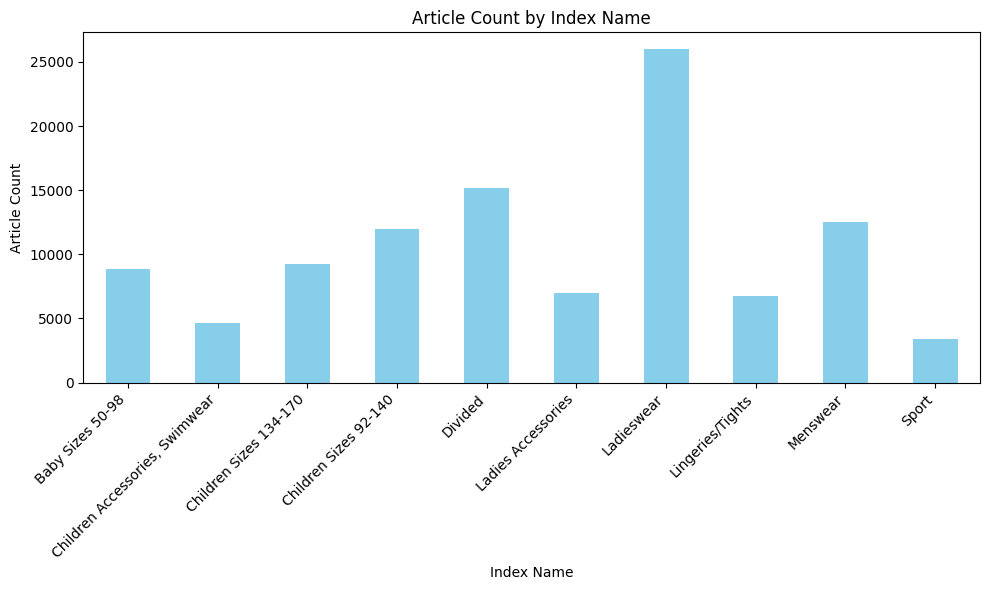

In [ ]:
plt.figure(figsize=(10, 6))
articles_count.plot(kind='bar', color='skyblue')
plt.title('Article Count by Index Name')
plt.xlabel('Index Name')
plt.ylabel('Article Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


This graph showcases the number of unique articles in each of these categories.
The variety in data should allow us to use this column as a feature in our model.

In [ ]:
product_counts = articles['product_group_name'].value_counts()
product_counts = product_counts.sort_values(ascending=False)

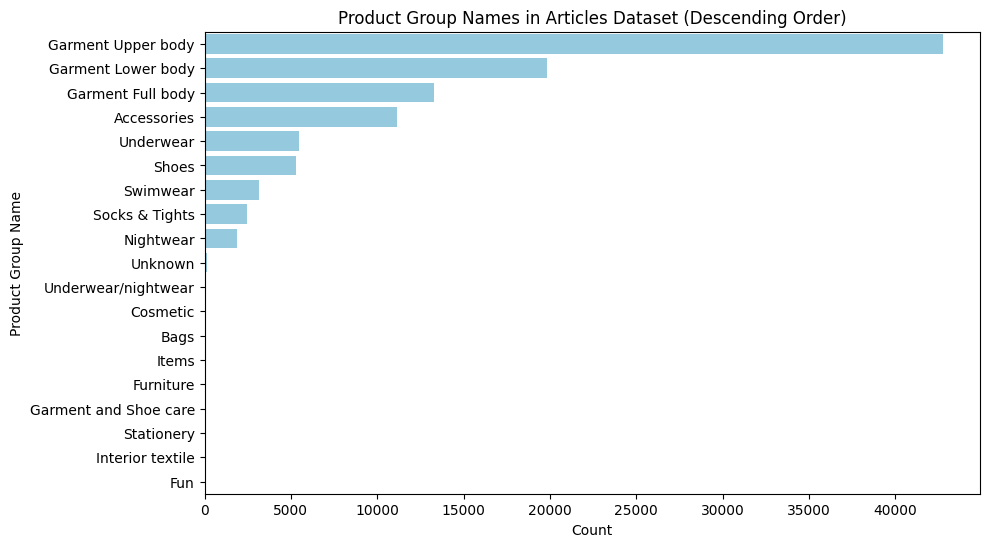

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=product_counts.values, y=product_counts.index, color='skyblue')
plt.xlabel("Count")
plt.ylabel("Product Group Name")
plt.title("Product Group Names in Articles Dataset (Descending Order)")
plt.show()

In [ ]:
numerical_cols = articles.select_dtypes(include=['int64']).columns.tolist()
print(articles[numerical_cols].describe())

         article_id   product_code  product_type_no  graphical_appearance_no  \
count  1.055420e+05  105542.000000    105542.000000             1.055420e+05   
mean   6.984246e+08  698424.563378       234.861875             1.009515e+06   
std    1.284624e+08  128462.384432        75.049308             2.241359e+04   
min    1.087750e+08  108775.000000        -1.000000            -1.000000e+00   
25%    6.169925e+08  616992.500000       252.000000             1.010008e+06   
50%    7.022130e+08  702213.000000       259.000000             1.010016e+06   
75%    7.967030e+08  796703.000000       272.000000             1.010016e+06   
max    9.594610e+08  959461.000000       762.000000             1.010029e+06   

       colour_group_code  perceived_colour_value_id  \
count      105542.000000              105542.000000   
mean           32.233822                   3.206183   
std            28.086154                   1.563839   
min            -1.000000                  -1.000000   
25% 

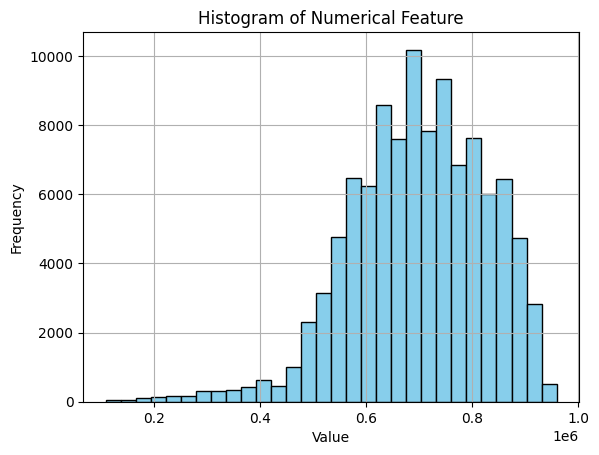

In [ ]:
articles['product_code'].hist(bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Numerical Feature')
plt.show()

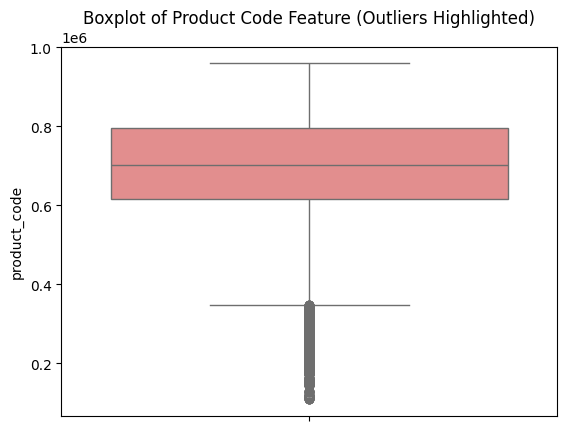

In [ ]:
sns.boxplot(y=articles['product_code'], color='lightcoral')
plt.title('Boxplot of Product Code Feature (Outliers Highlighted)')
plt.show()

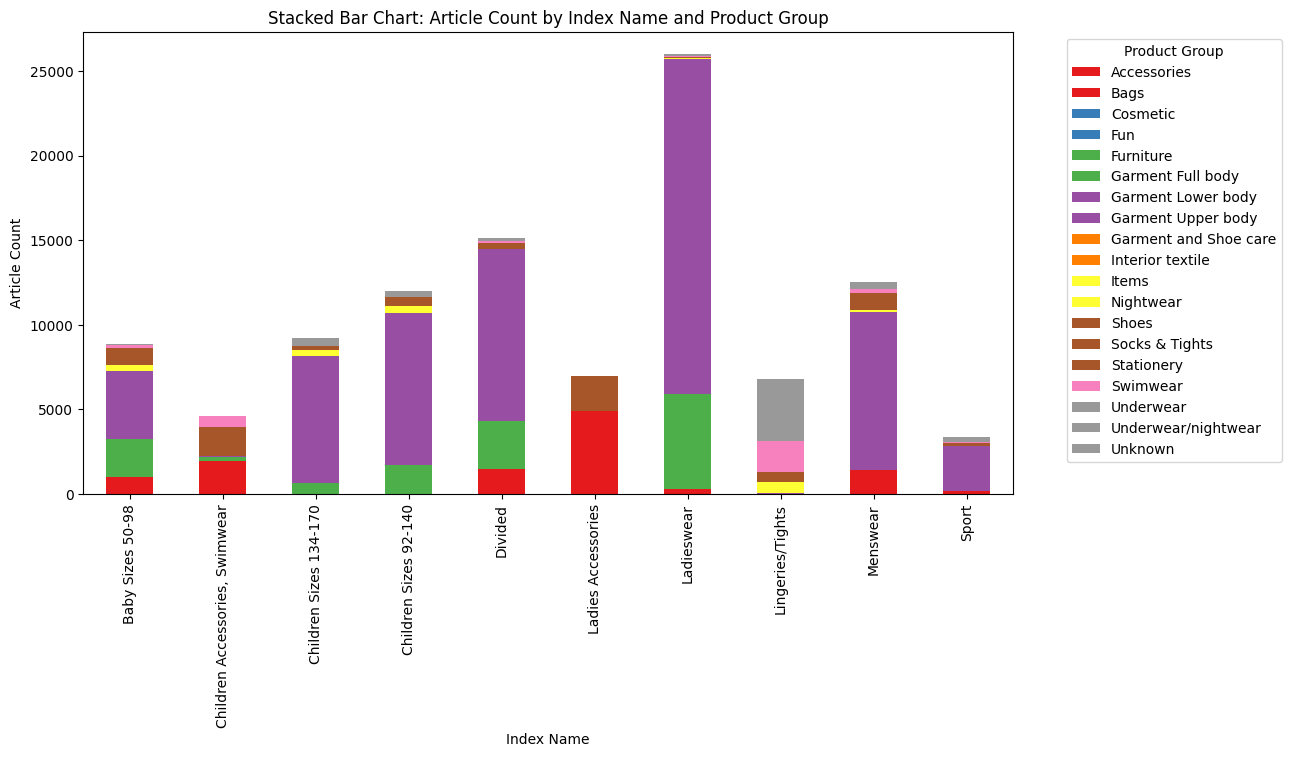

In [ ]:
articles_stacked = articles.groupby(['index_name', 'product_group_name']).count()['article_id'].unstack()

articles_stacked.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set1', title='Stacked Bar Chart: Article Count by Index Name and Product Group', xlabel='Index Name', ylabel='Article Count').legend(title='Product Group', bbox_to_anchor=(1.05, 1), loc='upper left')

This column in the data set showcases a good variety of data in the subcategories. We can attempt to use this as a feature to finetune the model.

In [ ]:
top_groups = articles.groupby(['product_group_name']).count()['article_id'].sort_values(ascending=False).head(10)
top_groups

,article_id
product_group_name,
Garment Upper body,42741
Garment Lower body,19812
Garment Full body,13292
Accessories,11158
Underwear,5490
Shoes,5283
Swimwear,3127
Socks & Tights,2442
Nightwear,1899


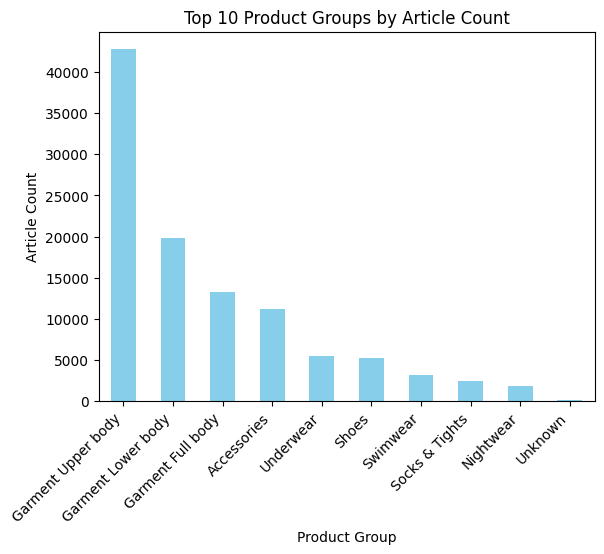

In [ ]:
top_groups.plot(kind='bar', color='skyblue')
plt.title('Top 10 Product Groups by Article Count')
plt.xlabel('Product Group')
plt.ylabel('Article Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
top_graphical_appearance = articles.groupby(['graphical_appearance_name']).count()['article_id'].sort_values(ascending=False).head(10)
top_graphical_appearance

,article_id
graphical_appearance_name,
Solid,49747
All over pattern,17165
Melange,5938
Stripe,4990
Denim,4842
Front print,3215
Placement print,3098
Check,2178
Colour blocking,1830


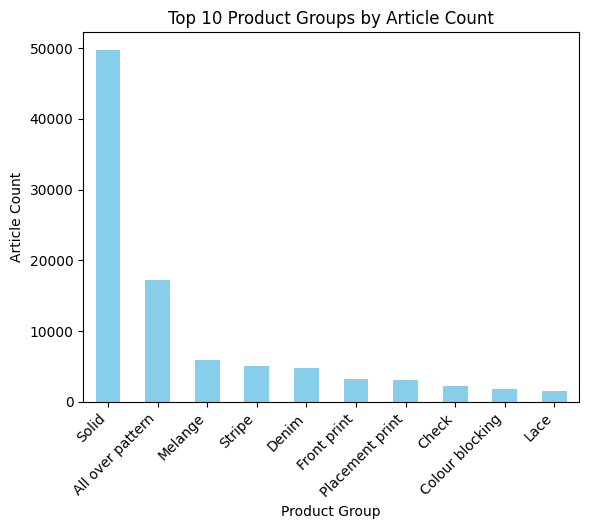

In [ ]:
top_graphical_appearance.plot(kind='bar', color='skyblue')
plt.title('Top 10 Product Groups by Article Count')
plt.xlabel('Product Group')
plt.ylabel('Article Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
categorical = articles.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical:
    le = LabelEncoder()
    articles[col] = le.fit_transform(articles[col])  # Convert to numbers
    label_encoders[col] = le  # Store encoders for decoding later

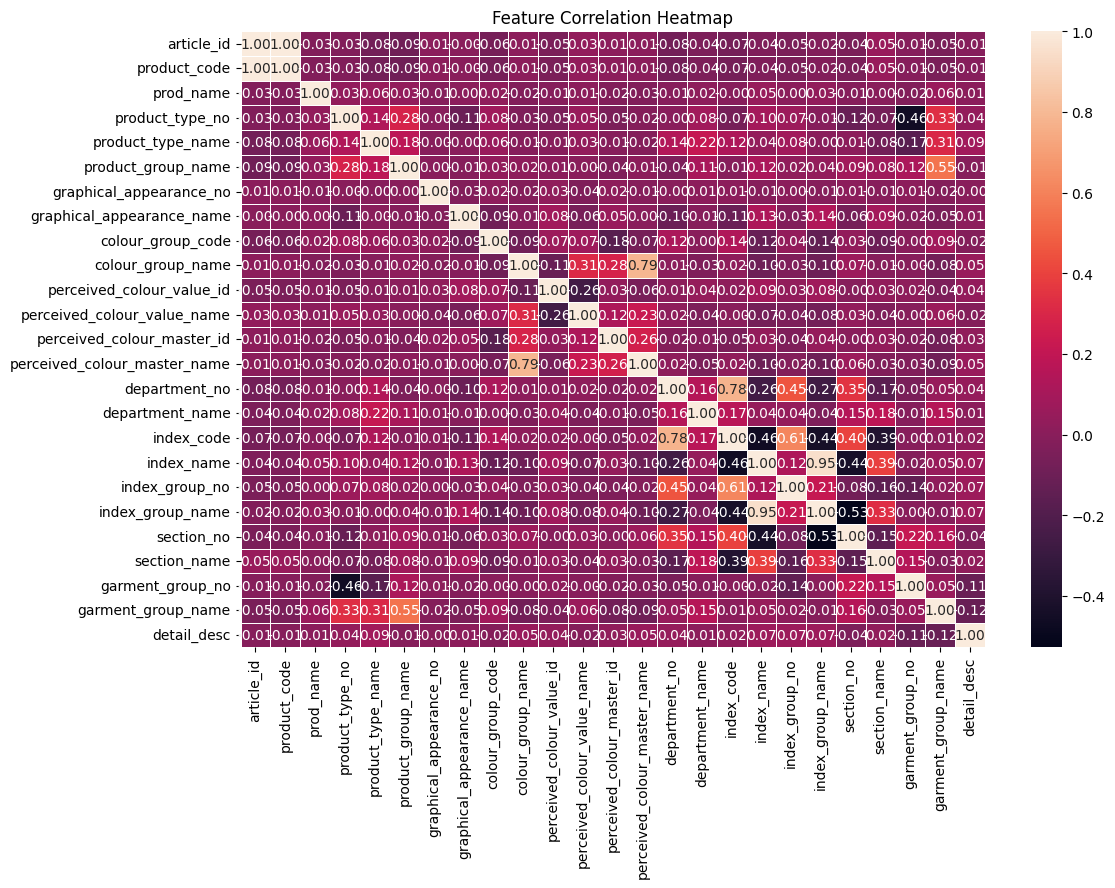

In [ ]:
#correlation
corr_matrix = articles.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

CUSTOMERS

In [ ]:
customers.shape

(1371980, 7)

In [ ]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [ ]:
customers.nunique()

,0
customer_id,1371980
FN,1
Active,1
club_member_status,3
fashion_news_frequency,3
age,84
postal_code,352899


In [ ]:
customers.isnull().sum()

,0
customer_id,0
FN,895050
Active,907576
club_member_status,6062
fashion_news_frequency,16011
age,15861
postal_code,0


In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355969 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [ ]:
customers['customer_id'].duplicated().any()

False

In [ ]:
distribution = customers.groupby('age')['customer_id'].count().sort_values(ascending=False)
distribution.head()

,customer_id
age,
21.0,67530
24.0,56124
20.0,55196
25.0,54989
23.0,54867


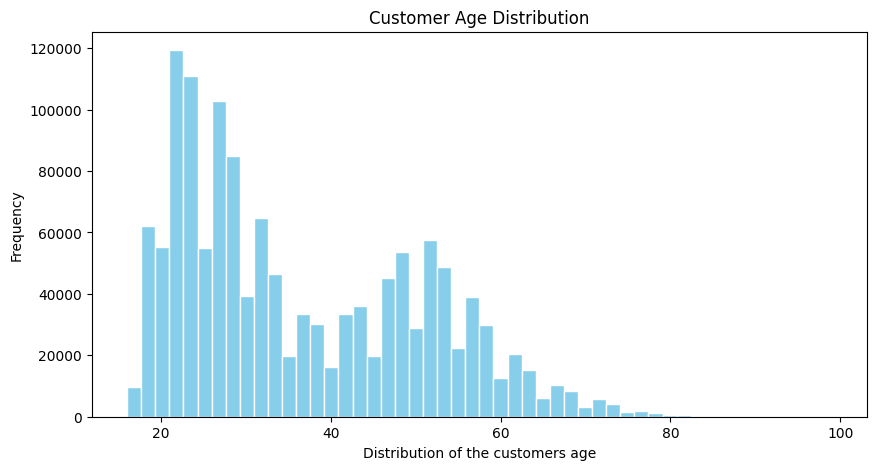

In [ ]:
plt.figure(figsize=(10, 5))

# Plotting histogram with 50 bins and orange color
plt.hist(customers['age'], bins=50, color='skyblue', edgecolor='white')

# Adding labels and title
plt.xlabel('Distribution of the customers age')
plt.ylabel('Frequency')
plt.title('Customer Age Distribution')

# Show the plot
plt.show()

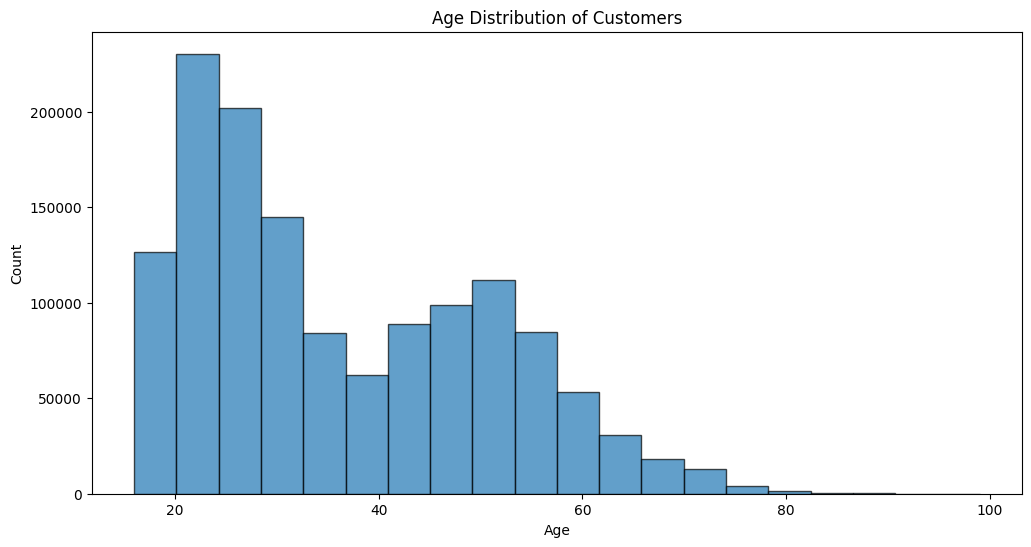

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(customers['age'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Customers')
plt.show()


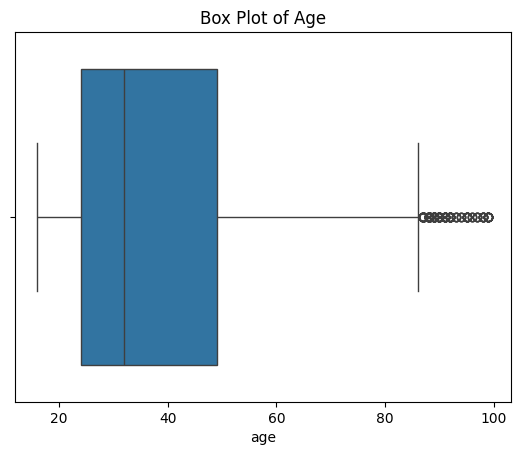

In [ ]:
sns.boxplot(x=customers['age'])
plt.title('Box Plot of Age')
plt.show()

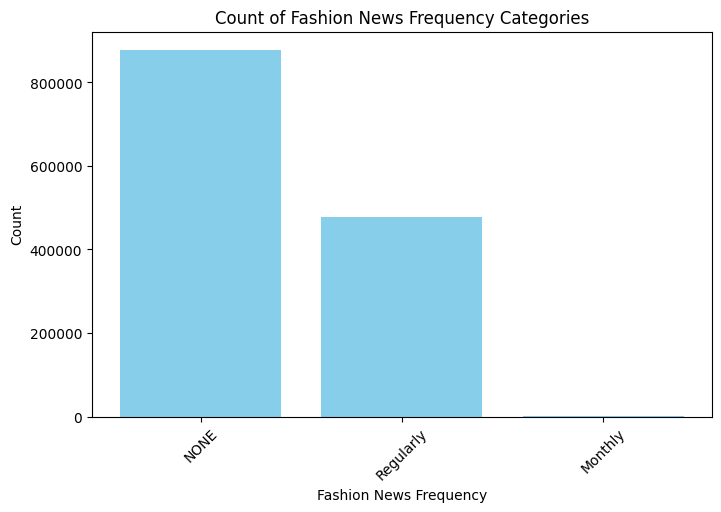

In [ ]:
# Count occurrences of each category
category_counts = customers['fashion_news_frequency'].value_counts()

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(category_counts.index, category_counts.values, color='skyblue')

# Labels and title
plt.xlabel("Fashion News Frequency")
plt.ylabel("Count")
plt.title("Count of Fashion News Frequency Categories")
plt.xticks(rotation=45)

# Show plot
plt.show()

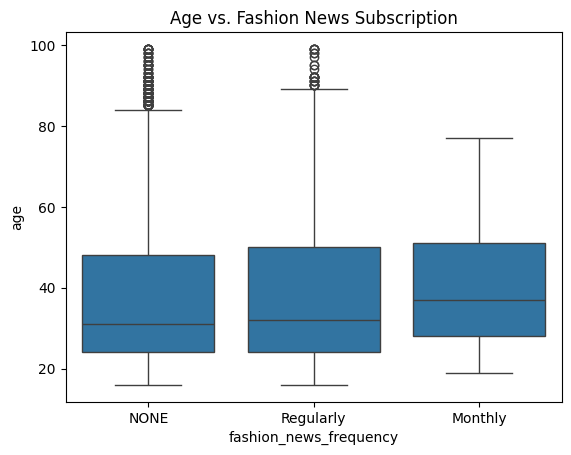

In [ ]:
sns.boxplot(x='fashion_news_frequency', y='age', data=customers)
plt.title('Age vs. Fashion News Subscription')
plt.show()

In [ ]:
customers.postal_code.count()

1371980

In [ ]:
postal_counts = customers['postal_code'].value_counts()
top_10 = postal_counts.head(10)
print(top_10)

postal_code
2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c    120303
cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac5ec985080fd92243c8       261
714976379549eb90aae4a71bca6c7402cc646ae7c40f6c1cb91d4b5a18623fc1       159
7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5d1e4ba6a75456b96a7       157
5b7eb31eabebd3277de632b82267286d847fd5d44287ee150bb4206b48439145       156
1f5bd429acc88fbbf24de844a59e438704aa8761bc7b99fd977cad297c50b74c       154
9d5787501bf1c77592156ba51eab13f4a2670c807686431a9e22a69090b02358       141
a1959a16bf167858c93a66ec2a330644512b25fb10f97eee2058549885af4dbd       138
087a46b65170845b4a55226ff1eb748ce7843d4b637cbe17f6bfbd1e645d2ffb       134
4d22901a97bd952bb92cdd31b38c39b41dd3250a735cabdfac1503eb405b807d       132
Name: count, dtype: int64


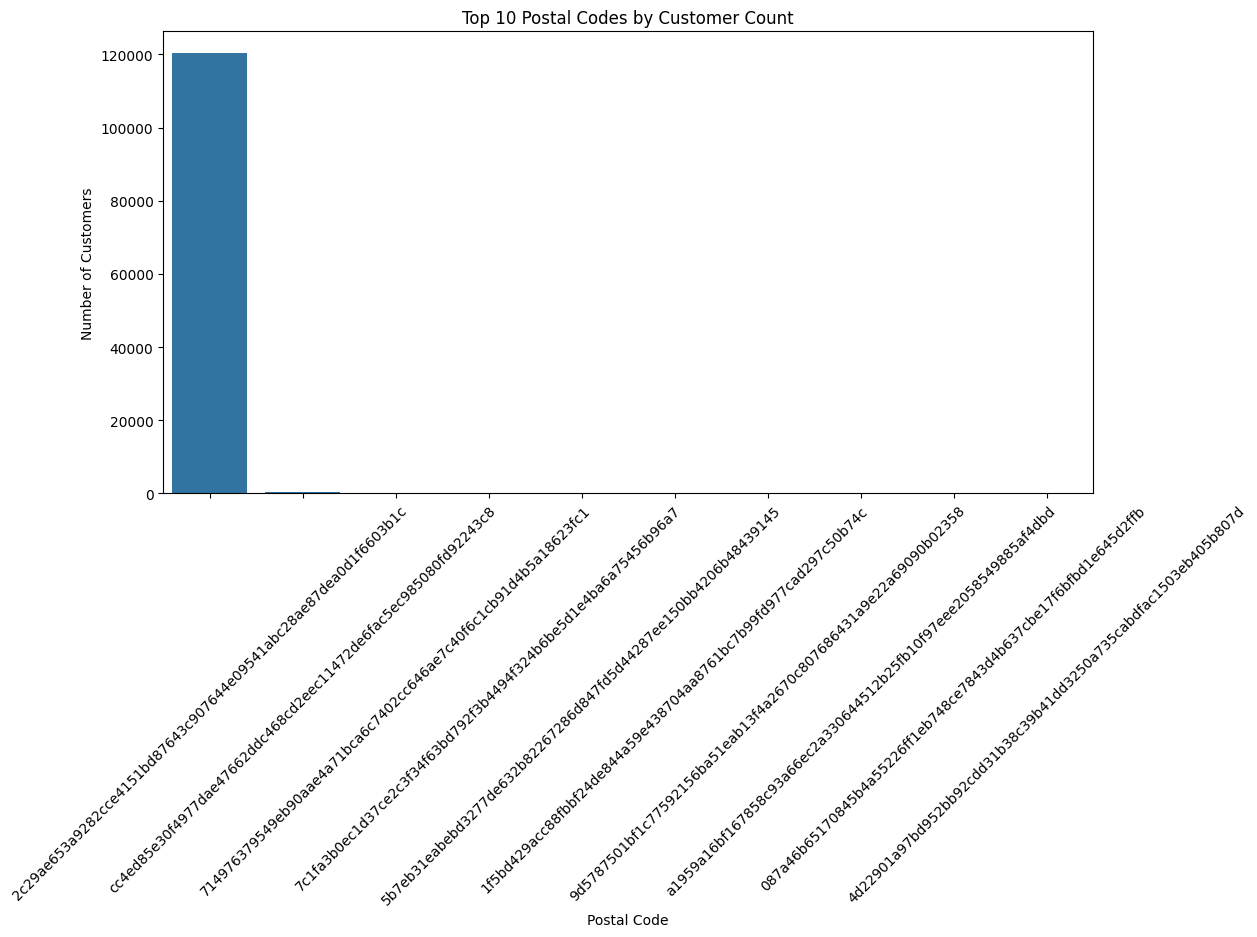

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10.index, y=top_10.values)

# Labels and Title
plt.xlabel('Postal Code')
plt.ylabel('Number of Customers')
plt.title('Top 10 Postal Codes by Customer Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Show the plot
plt.show()

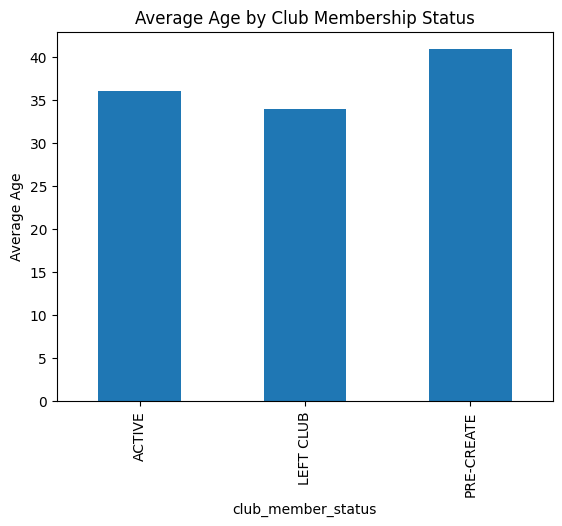

In [ ]:
customers.groupby('club_member_status')['age'].mean().plot(kind='bar')
plt.ylabel('Average Age')
plt.title('Average Age by Club Membership Status')
plt.show()

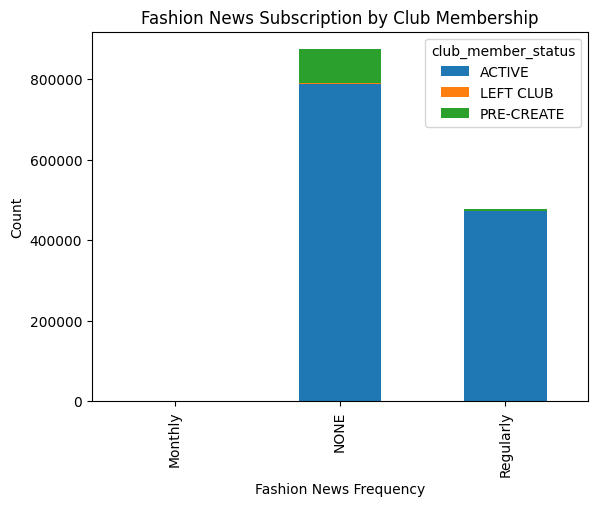

In [ ]:
pd.crosstab(customers['fashion_news_frequency'], customers['club_member_status']).plot(kind='bar', stacked=True)
plt.title('Fashion News Subscription by Club Membership')
plt.xlabel('Fashion News Frequency')
plt.ylabel('Count')
plt.show()


In [ ]:
# #articles merge
# customers_merge = customers[['age']]

# # Merge transactions with articles to get product details
# merged_articles = articles.merge(customers_merge, on='customer_id', how='left')

# print(merged_articles.head())

TRANSACTIONS TABLE

In [ ]:
tr.shape

(31788324, 5)

In [ ]:
tr.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [ ]:
tr.isnull().sum()

,0
t_dat,0
customer_id,0
article_id,0
price,0
sales_channel_id,0


In [ ]:
print(tr.describe(include='all'))


             t_dat                                        customer_id  \
count     31788324                                           31788324   
unique         734                                            1362281   
top     2019-09-28  be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...   
freq        198622                                               1895   
mean           NaN                                                NaN   
std            NaN                                                NaN   
min            NaN                                                NaN   
25%            NaN                                                NaN   
50%            NaN                                                NaN   
75%            NaN                                                NaN   
max            NaN                                                NaN   

          article_id         price  sales_channel_id  
count   3.178832e+07  3.178832e+07      3.178832e+07  
unique       

In [ ]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


In [ ]:
numerical_cols_tr = tr.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(tr[numerical_cols_tr].describe())

         article_id         price  sales_channel_id
count  3.178832e+07  3.178832e+07      3.178832e+07
mean   6.962272e+08  2.782927e-02      1.704028e+00
std    1.334480e+08  1.918113e-02      4.564786e-01
min    1.087750e+08  1.694915e-05      1.000000e+00
25%    6.328030e+08  1.581356e-02      1.000000e+00
50%    7.145820e+08  2.540678e-02      2.000000e+00
75%    7.865240e+08  3.388136e-02      2.000000e+00
max    9.562170e+08  5.915254e-01      2.000000e+00


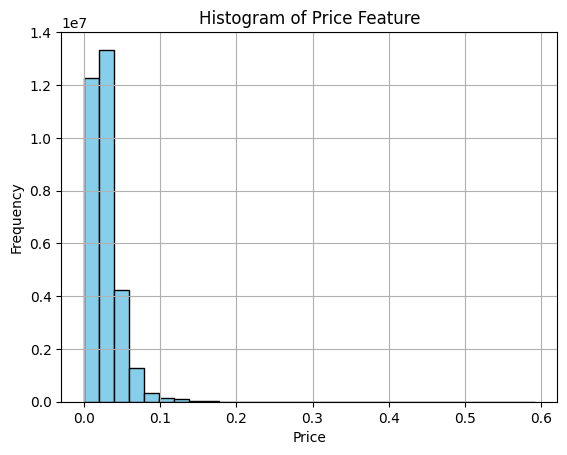

In [ ]:
tr['price'].hist(bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price Feature')
plt.show()

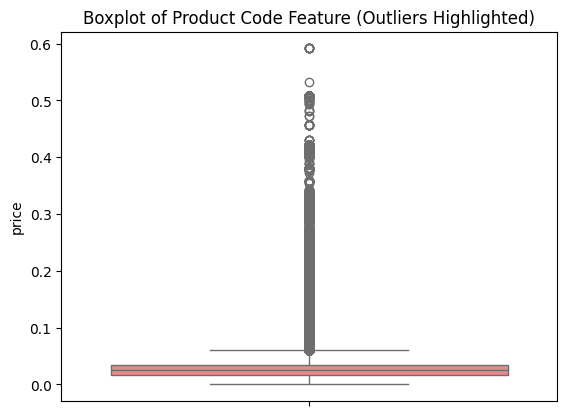

In [ ]:
sns.boxplot(y=tr['price'], color='lightcoral')
plt.title('Boxplot of Product Code Feature (Outliers Highlighted)')
plt.show()

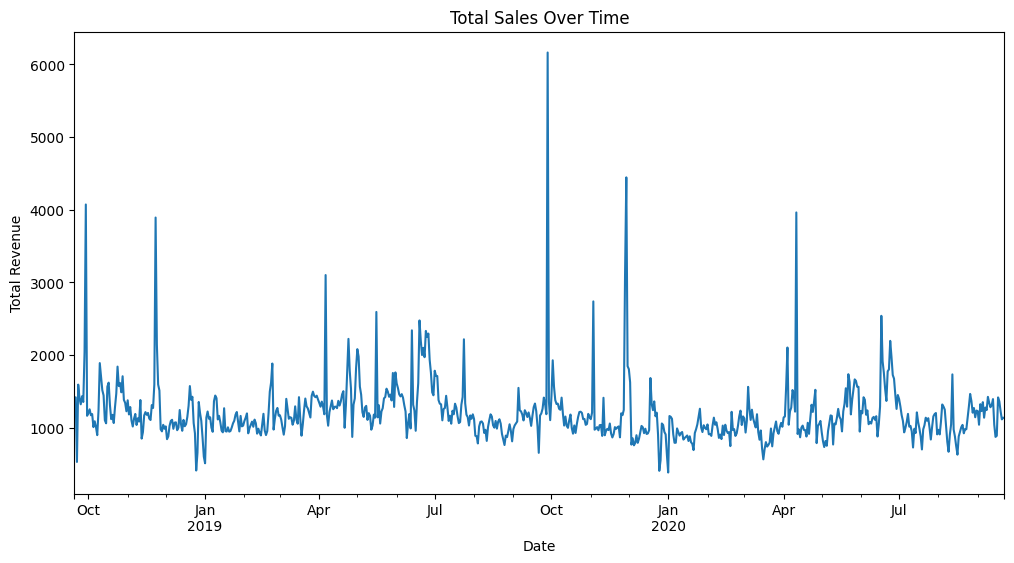

In [ ]:
tr['t_dat'] = pd.to_datetime(tr['t_dat'])
sales_per_date= tr.groupby('t_dat')['price'].sum()

plt.figure(figsize=(12, 6))
sales_per_date.plot(kind='line')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.show()


In [ ]:
#articles merge
articles_subset = articles[['article_id', 'index_name', 'prod_name', 'section_name']]

# Merge transactions with articles to get product details
merged_tr = tr.merge(articles_subset, on='article_id', how='left')

print(merged_tr.head())

        t_dat                                        customer_id  article_id  \
0  2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   663713001   
1  2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   541518023   
2  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   505221004   
3  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   685687003   
4  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   685687004   

      price  sales_channel_id        index_name                 prod_name  \
0  0.050831                 2  Lingeries/Tights  Atlanta Push Body Harlow   
1  0.030492                 2  Lingeries/Tights   Rae Push (Melbourne) 2p   
2  0.015237                 2           Divided               Inca Jumper   
3  0.016932                 2        Ladieswear      W YODA KNIT OL OFFER   
4  0.016932                 2        Ladieswear      W YODA KNIT OL OFFER   

                 section_name  
0             Womens Lin

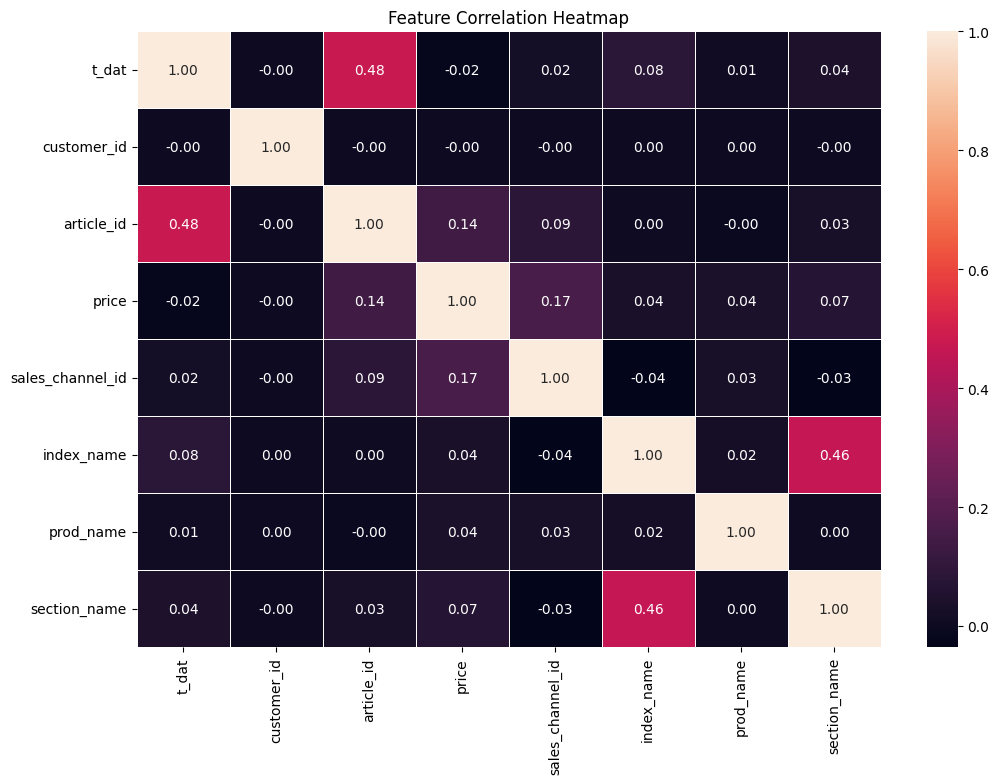

In [ ]:
categorical_cols = merged_tr.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    merged_tr[col] = le.fit_transform(merged_tr[col])  # Convert to numbers
    label_encoders[col] = le  # Store encoders for decoding later


corr_matrix = merged_tr.corr()

# Heatmap for visualization
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
top_selling = merged_tr['index_name'].value_counts().head(10)
top_selling


,count
index_name,
Ladieswear,13058283
Divided,7138254
Lingeries/Tights,5582246
Ladies Accessories,1774731
Menswear,1771053
Sport,1246408
Children Sizes 134-170,503507
Children Sizes 92-140,350514
Baby Sizes 50-98,254137


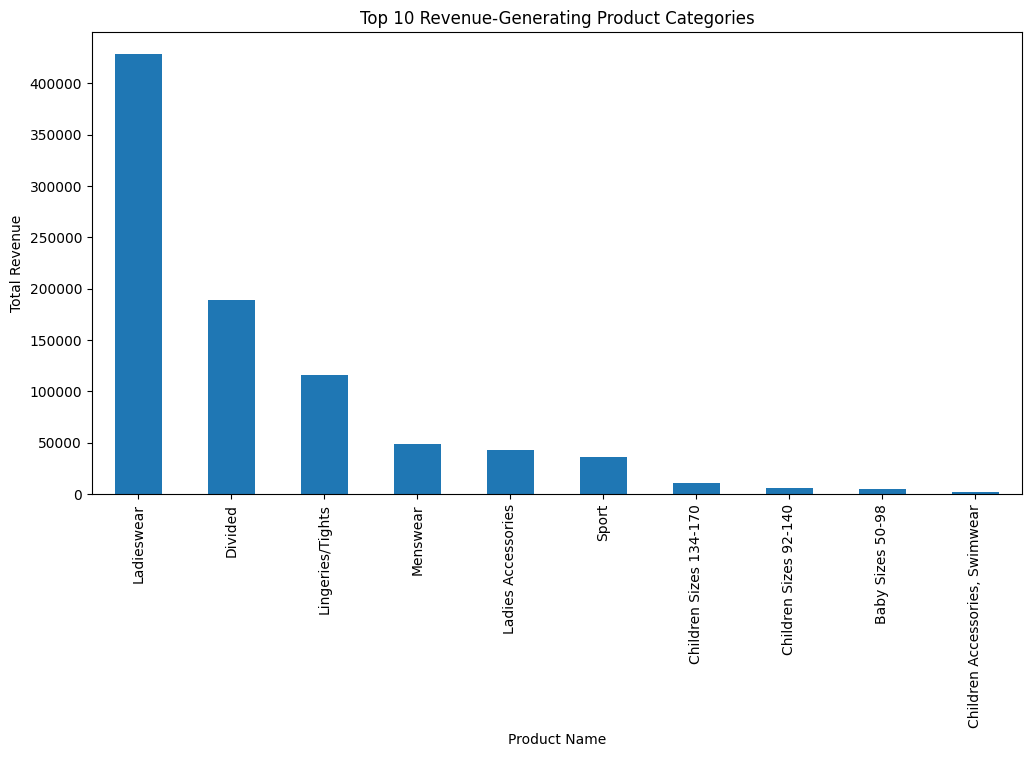

In [ ]:
revenue_per_product = merged_tr.groupby('index_name')['price'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
revenue_per_product.plot(kind='bar')

plt.title('Top 10 Revenue-Generating Product Categories')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')

plt.show()

In [ ]:
#highest spending customers
customer_purchases = tr['customer_id'].value_counts()
customer_purchases

,count
customer_id,
be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b,1895
b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71,1441
49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05b50a4cd88e34d0748f,1364
a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc,1361
cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed6012e7e5bea016b4d6,1237
...,...
63b70b71291668f0a63ade8e321fb3eccb80eba164f2087dad471de065f18e1f,1
950b172c36d169bf427545991fe66371f21a085799b44780fdcb2da6a3091613,1
7c284f13f4af9d6a53f97279381638ed0cb7afaa4fd4f3eaadc21993ea45fc69,1


In [ ]:
# customer merge
customers_subset = customers[['customer_id', 'age', 'club_member_status', 'postal_code']]

merged_ct = tr.merge(customers_subset, on='customer_id', how='left')

merged_ct.head()


,t_dat,customer_id,article_id,price,sales_channel_id,age,club_member_status,postal_code
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,24.0,ACTIVE,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,24.0,ACTIVE,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,32.0,ACTIVE,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,32.0,ACTIVE,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,32.0,ACTIVE,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...


In [ ]:
customer_age_spending = merged_ct['age'].value_counts()
customer_age_spending

,count
age,
25.0,1580726
26.0,1576133
24.0,1501001
27.0,1482961
23.0,1352937
...,...
99.0,98
93.0,95
94.0,61


In [ ]:
spending_member_status = merged_ct['club_member_status'].value_counts()
spending_member_status

,count
club_member_status,
ACTIVE,31057401
PRE-CREATE,660219
LEFT CLUB,8539


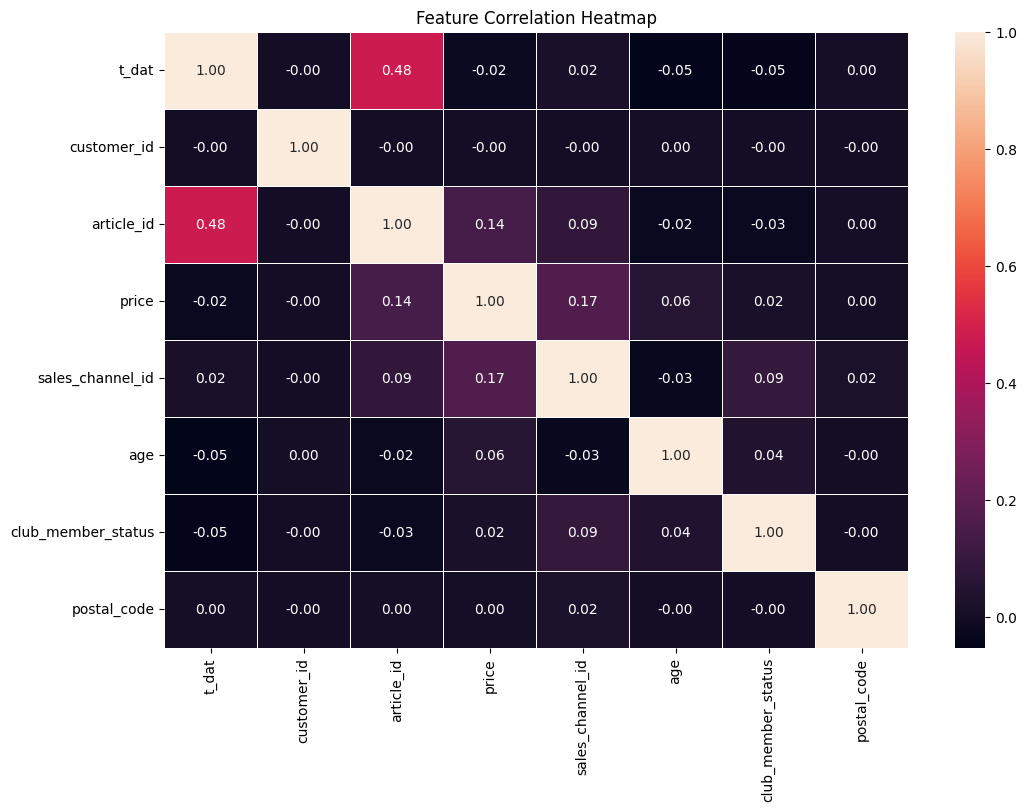

In [ ]:
categorical_cols = merged_ct.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    merged_ct[col] = le.fit_transform(merged_ct[col])  # Convert to numbers
    label_encoders[col] = le  # Store encoders for decoding later


corr_matrix = merged_ct.corr()

# Heatmap for visualization
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=merged_ct['age'], y=merged_ct['price'])
plt.xlabel('Customer Age')
plt.ylabel('Spending (Price)')
plt.title('Customer Spending by Age')
plt.show()


In [ ]:
# second customer merge on articles

articles_subset = articles[['article_id', 'prod_name','product_group_name','product_type_name','colour_group_name', 'index_name']]
transactions_subset = tr[['customer_id', 'article_id', 'price']]

# Merge transactions with articles to get product details
merged_tr = tr.merge(articles_subset, on='article_id', how='left')

print(merged_tr.head())

In [ ]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB
